In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from sklearn.feature_extraction import DictVectorizer

In [3]:
green_taxi = pd.read_parquet('../01-intro/data/green_tripdata_2021-01.parquet')

In [4]:
green_taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


In [5]:
green_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               76518 non-null  int64         
 1   lpep_pickup_datetime   76518 non-null  datetime64[us]
 2   lpep_dropoff_datetime  76518 non-null  datetime64[us]
 3   store_and_fwd_flag     40471 non-null  object        
 4   RatecodeID             40471 non-null  float64       
 5   PULocationID           76518 non-null  int64         
 6   DOLocationID           76518 non-null  int64         
 7   passenger_count        40471 non-null  float64       
 8   trip_distance          76518 non-null  float64       
 9   fare_amount            76518 non-null  float64       
 10  extra                  76518 non-null  float64       
 11  mta_tax                76518 non-null  float64       
 12  tip_amount             76518 non-null  float64       
 13  t

In [6]:
green_taxi['duration'] = green_taxi.lpep_dropoff_datetime - green_taxi.lpep_pickup_datetime

In [7]:
green_taxi.duration = green_taxi.duration.apply(lambda td: td.total_seconds() / 60)

In [8]:
green_taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00,0.066667


In [9]:
green_taxi.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [10]:
green_taxi = green_taxi[((green_taxi.duration >= 1) & (green_taxi.duration <= 60))]

In [ ]:
green_taxi['PU_DO'] = green_taxi.PULocationID + '_' + green_taxi.DOLocationID

In [47]:
# categorical = ['PULocationID', 'DOLocationID']
categorical = ['PU_DO']
numerical = ['trip_distance']

In [48]:
green_taxi[categorical] = green_taxi[categorical].astype(str)

In [49]:
dv = DictVectorizer()

In [50]:
train_dicts = green_taxi[categorical + numerical].to_dict(orient='records')

In [51]:
X_train = dv.fit_transform(train_dicts)

In [52]:
dv.feature_names_

['PU_DO=100_168',
 'PU_DO=100_180',
 'PU_DO=100_190',
 'PU_DO=100_225',
 'PU_DO=100_235',
 'PU_DO=100_42',
 'PU_DO=100_49',
 'PU_DO=100_69',
 'PU_DO=100_82',
 'PU_DO=100_89',
 'PU_DO=101_101',
 'PU_DO=101_13',
 'PU_DO=101_135',
 'PU_DO=101_139',
 'PU_DO=101_16',
 'PU_DO=101_175',
 'PU_DO=101_188',
 'PU_DO=101_19',
 'PU_DO=101_191',
 'PU_DO=101_196',
 'PU_DO=101_205',
 'PU_DO=101_218',
 'PU_DO=101_219',
 'PU_DO=101_226',
 'PU_DO=101_260',
 'PU_DO=101_265',
 'PU_DO=101_64',
 'PU_DO=101_7',
 'PU_DO=101_75',
 'PU_DO=101_86',
 'PU_DO=101_95',
 'PU_DO=102_102',
 'PU_DO=102_117',
 'PU_DO=102_121',
 'PU_DO=102_130',
 'PU_DO=102_131',
 'PU_DO=102_134',
 'PU_DO=102_139',
 'PU_DO=102_145',
 'PU_DO=102_16',
 'PU_DO=102_160',
 'PU_DO=102_164',
 'PU_DO=102_182',
 'PU_DO=102_196',
 'PU_DO=102_197',
 'PU_DO=102_198',
 'PU_DO=102_205',
 'PU_DO=102_21',
 'PU_DO=102_219',
 'PU_DO=102_235',
 'PU_DO=102_236',
 'PU_DO=102_242',
 'PU_DO=102_249',
 'PU_DO=102_258',
 'PU_DO=102_263',
 'PU_DO=102_28',
 'PU_DO=1

In [53]:
y_train = green_taxi.duration

In [54]:
y_train

0         3.933333
1         8.750000
2         5.966667
3         7.083333
7         2.316667
           ...    
76513    38.000000
76514    38.000000
76515    11.000000
76516    27.000000
76517    10.000000
Name: duration, Length: 73908, dtype: float64

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
lr = LinearRegression()

In [61]:
model = lr.fit(X_train, y_train)

In [62]:
y_pred = model.predict(X_train)

/tmp/ipykernel_6074/792334868.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')


/tmp/ipykernel_6074/792334868.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


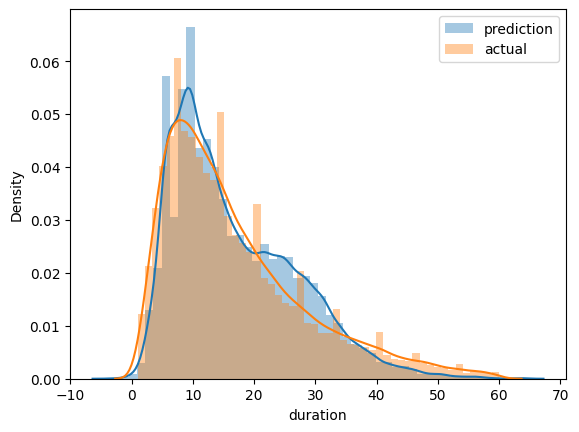

In [59]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()
plt.show()

In [60]:
mean_squared_error(y_pred, y_train, squared=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5.699564118198926

In [63]:
import pickle

In [65]:
with open('model/lin_reg.bin', 'wb') as f:
    pickle.dump((dv, model), f)